In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter    

In [2]:
df = pd.read_csv('data.csv')

In [8]:
ans = [i for i in range(3, 44)]

In [12]:
wlabels = [0] + ans

In [13]:
df.iloc[wlabels, 17:]

,Q1,Q2_1,Q3,Q4,Q5_1,Q5_2,Q5_3
0,Which category applies to your major?,How frequently do you use AI tools for academi...,Please select all AI tools and services you us...,Please select all academic tasks you use/have ...,Rank your agreement with the following stateme...,Rank your agreement with the following stateme...,Rank your agreement with the following stateme...
3,Engineering Major,3,"ChatGPT,DeepSeek,Grammarly AI","Writing and Editing (generating outlines, draf...",3,4,2
4,NaN,NaN,DeepSeek,Studying and Note-Taking (summarizing lecture ...,3,3,3
5,Engineering Major,3,ChatGPT,"Writing and Editing (generating outlines, draf...",4,3,4
6,Liberal Arts and Sciences Major,3,"ChatGPT,Gemini,Grammarly AI","Writing and Editing (generating outlines, draf...",5,5,5
7,Business Major,5,"ChatGPT,Gemini,Claude","Writing and Editing (generating outlines, draf...",5,5,4
8,Liberal Arts and Sciences Major,5,"ChatGPT,DeepSeek,Claude","Writing and Editing (generating outlines, draf...",5,5,5
9,Engineering Major,3,"ChatGPT,Gemini","Writing and Editing (generating outlines, draf...",4,5,3
10,Engineering Major,4,"ChatGPT,Claude,Dall-E","Writing and Editing (generating outlines, draf...",5,4,3
11,Engineering Major,4,"ChatGPT,Gemini,Dall-E","Writing and Editing (generating outlines, draf...",5,4,4


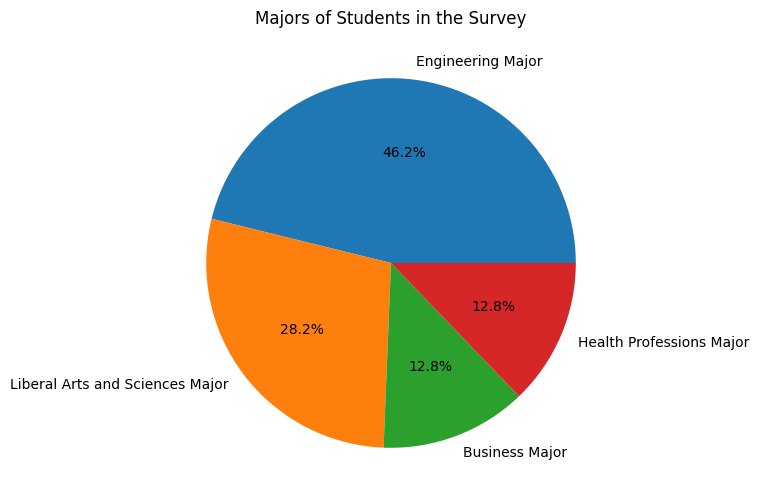

In [16]:
q1 = df.loc[3:, "Q1"]
q1_counts = q1.value_counts()
q1_counts
q1_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Majors of Students in the Survey') 
plt.ylabel('')  # Remove the y-axis label for better appearance
plt.show()

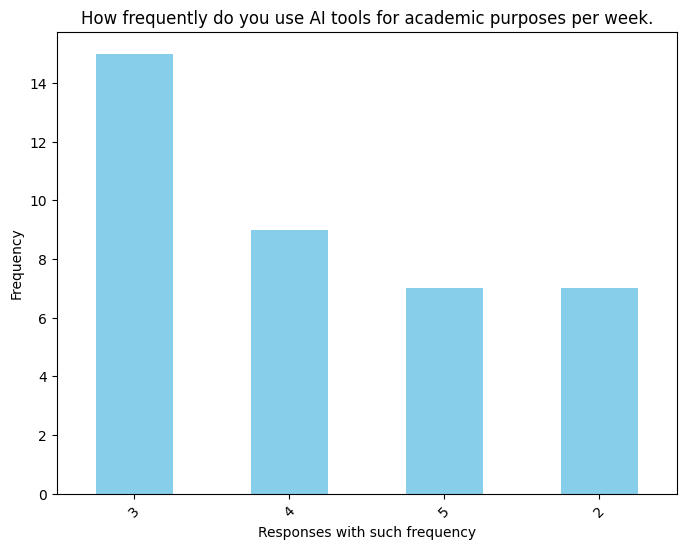

In [17]:
q2 = df.loc[3:, "Q2_1"].value_counts()
q2.plot.bar(figsize=(8, 6), color='skyblue', title='How frequently do you use AI tools for academic purposes per week.')
plt.xlabel('Responses with such frequency')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [120]:
q2df = df[3:].copy(deep=True)

In [121]:
response_mapping = {
    0 : "Never",
    1: "A few times a month",
    2: "At least once a week",
    3: "A few times per week", 
    4: "Nearly every day",
    5: "Daily"
}

# Create a function to handle the mapping including NaNs
def safe_map(x, mapping, default="No Response"):
    if pd.isna(x):
        return default
    try:
        # Try to use the value as an integer key
        return mapping.get(int(x), default)
    except (ValueError, TypeError):
        # If conversion fails, return the default
        return default

# Apply the function to create the new columns
q2df["nQ2_1"] = q2df["Q2_1"].apply(lambda x: safe_map(x, response_mapping))

In [126]:
def q2plot(title, series_to_plot):
    # Drop "No Response"
    filtered_series = series_to_plot[series_to_plot != "No Response"]

    # Get value counts
    response_counts = filtered_series.value_counts()

    # Convert to DataFrame for Seaborn
    df_counts = pd.DataFrame({'Response': response_counts.index, 'Count': response_counts.values})

    # Set a visually appealing style
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 7))

    # Create the bar plot with improved aesthetics (following the deprecation warning)
    ax = sns.barplot(x='Count', y='Response', data=df_counts,
                    order=df_counts.sort_values('Count', ascending=False)['Response'],
                    hue='Response', palette="viridis", legend=False)

    # Add labels and title with better formatting
    plt.title(title, fontsize=16)
    plt.xlabel('Number of Respondents', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)


    # Add value labels on the bars
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.2, p.get_y() + p.get_height() / 2.,
                f'{int(width)}',
                ha='left', va='center', fontsize=10)

    # Remove spines for a cleaner look
    sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()

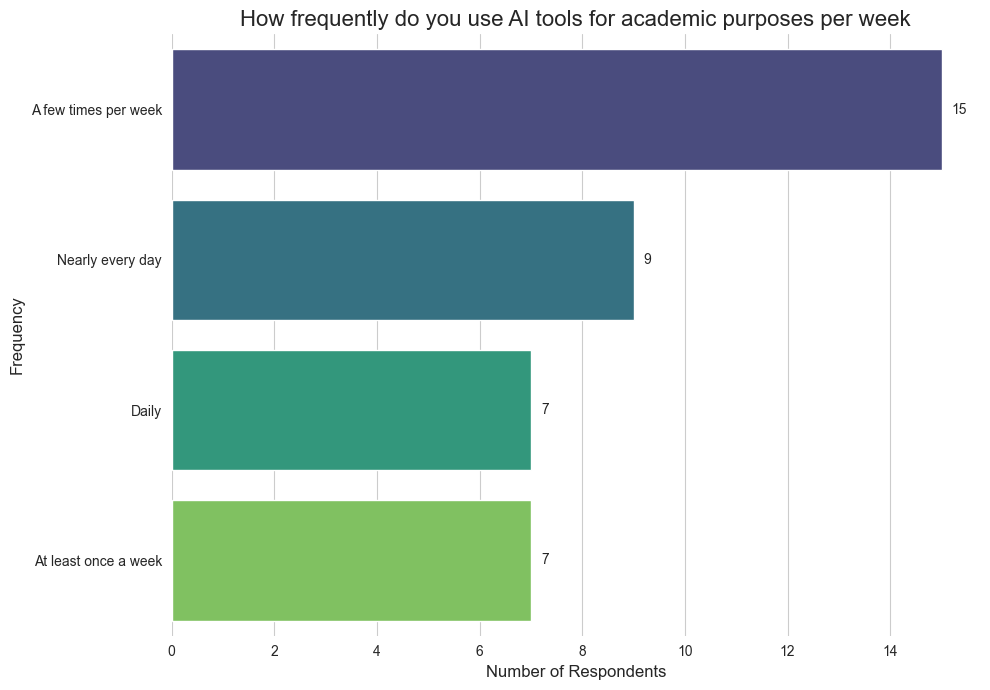

In [127]:
q2plot("How frequently do you use AI tools for academic purposes per week", q2df["nQ2_1"])

In [21]:
eng = df[df["Q1"] == "Engineering Major"]
lib = df[df["Q1"] == "Liberal Arts and Sciences Major"]
bus = df[df["Q1"] == "Business Major"]
health = df[df["Q1"] == "Health Professions Major"]

majors = [eng, lib, bus, health]

In [156]:
def q3plot(title, series_to_plot):
    # Drop "No Response"
    filtered_series = series_to_plot[series_to_plot != "No Response"]

    # Get value counts
    response_counts = filtered_series.value_counts()

    # Convert to DataFrame for Seaborn
    df_counts = pd.DataFrame({'Response': response_counts.index, 'Count': response_counts.values})

    # Set a visually appealing style
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 7))

    # Create the bar plot with improved aesthetics (following the deprecation warning)
    ax = sns.barplot(x='Count', y='Response', data=df_counts,
                    order=df_counts.sort_values('Count', ascending=False)['Response'],
                    hue='Response', palette="viridis", legend=False)

    # Add labels and title with better formatting
    plt.title(title, fontsize=16)
    plt.xlabel('Number of Respondents', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)


    # Add value labels on the bars
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.2, p.get_y() + p.get_height() / 2.,
                f'{int(width)}',
                ha='left', va='center', fontsize=10)

    # Remove spines for a cleaner look
    sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()


def q3plot2(title, data):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 7))

    # Create the bar plot (addressing the FutureWarning)
    ax = sns.barplot(x='Count', y='Option', data=data, hue='Option', palette="viridis", legend=False)

    # Add labels and title with better formatting
    plt.title(title, fontsize=16)
    plt.xlabel('Number of Mentions', fontsize=12)
    plt.ylabel('AI Tool', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Make x-axis ticks integers
    ax.set_xticks(ax.get_xticks().astype(int))

    # Add value labels on the bars
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.2, p.get_y() + p.get_height() / 2.,
                f'{int(width)}',
                ha='left', va='center', fontsize=10)

    # Remove spines for a cleaner look
    sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()

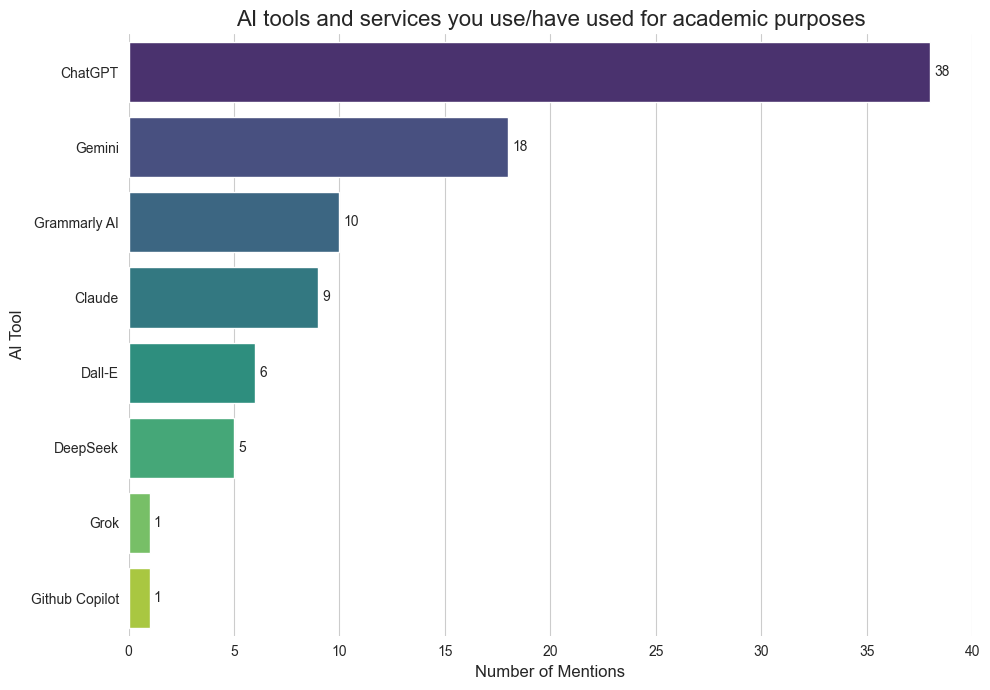

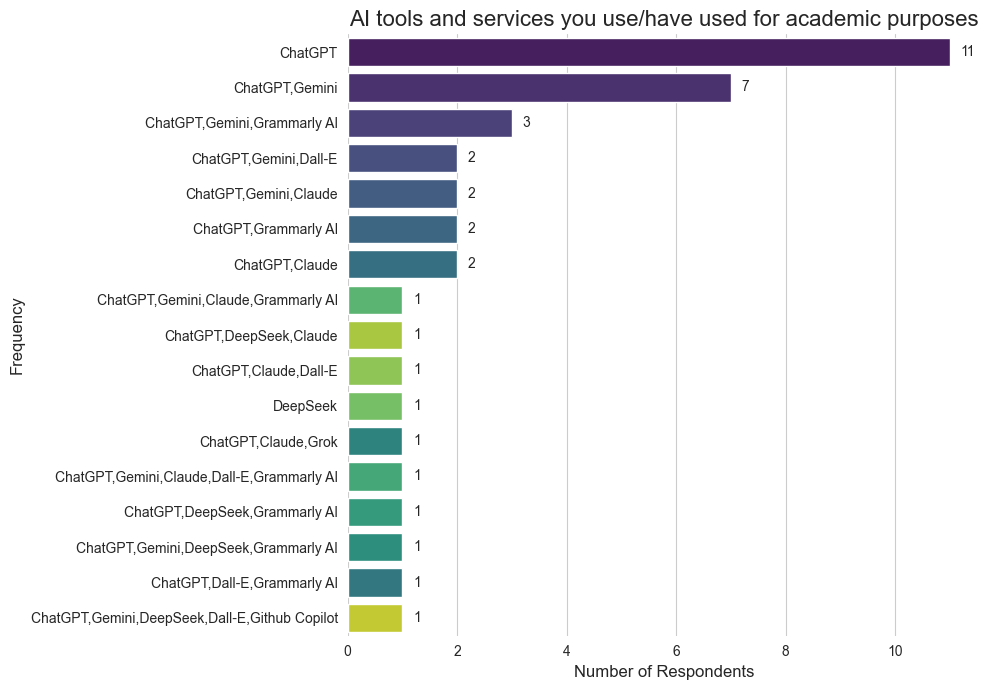

In [157]:
d = df[3:]

def count_multiple_choices(series):
    # Initialize a Counter
    counter = Counter()
    
    # Iterate through each response
    for response in series:
        # Skip NaN values
        if pd.isna(response):
            continue
        
        # Split by comma and strip whitespace
        choices = [choice.strip() for choice in response.split(',')]
        
        # Update counter with each individual choice
        counter.update(choices)
    
    # Convert counter to DataFrame for better visualization
    result = pd.DataFrame({
        'Option': list(counter.keys()),
        'Count': list(counter.values())
    }).sort_values('Count', ascending=False).reset_index(drop=True)
    
    return result

q3ans = count_multiple_choices(d["Q3"])
q3plot2("AI tools and services you use/have used for academic purposes", q3ans)
q3plot("AI tools and services you use/have used for academic purposes", d["Q3"])

All
           Option  Count
0         ChatGPT     38
1          Gemini     18
2    Grammarly AI     10
3          Claude      9
4          Dall-E      6
5        DeepSeek      5
6            Grok      1
7  Github Copilot      1


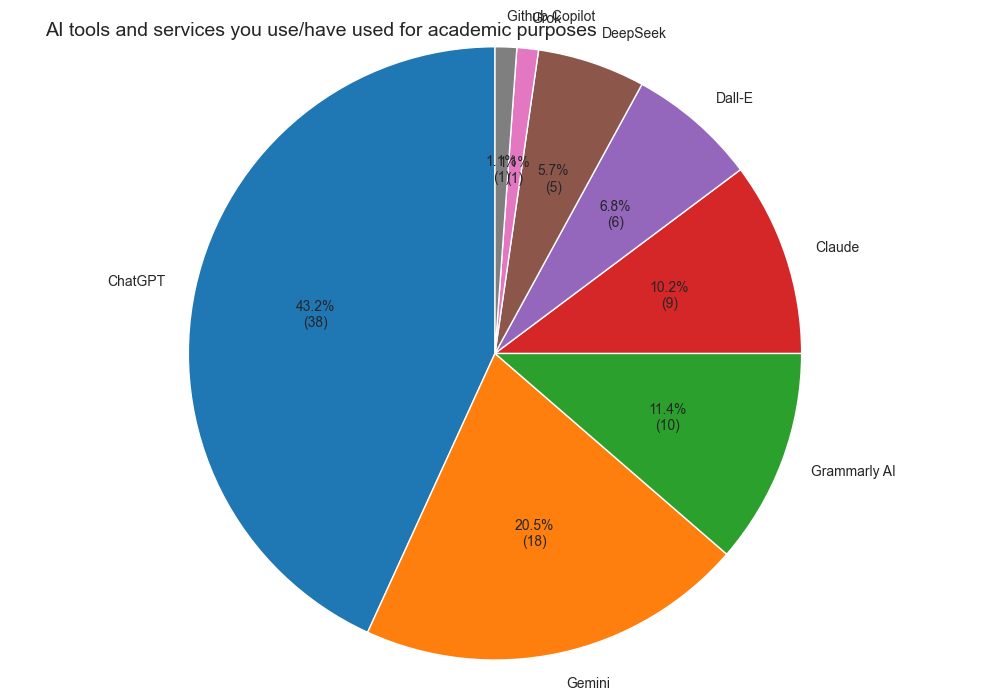

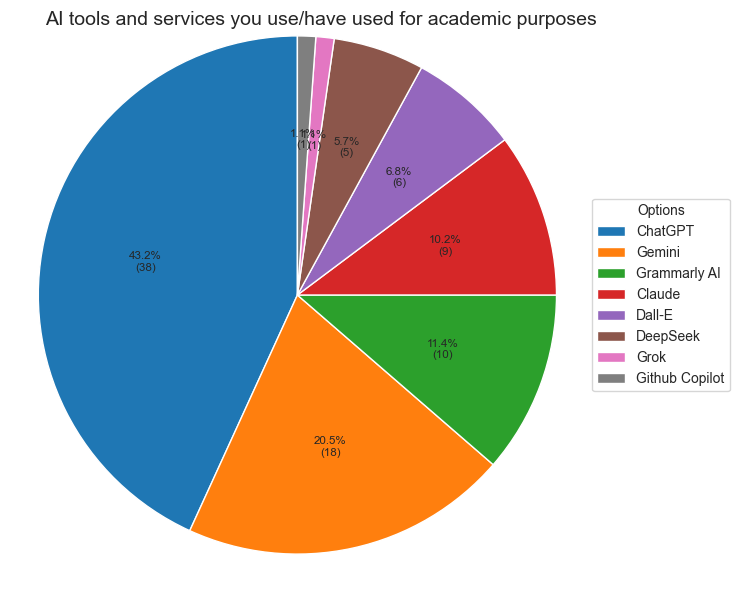


With percentages:
           Option  Count  Percentage
0         ChatGPT     38        90.5
1          Gemini     18        42.9
2    Grammarly AI     10        23.8
3          Claude      9        21.4
4          Dall-E      6        14.3
5        DeepSeek      5        11.9
6            Grok      1         2.4
7  Github Copilot      1         2.4

Percentage of respondents who selected each option:
           Option  Count  Percentage  Respondent_Percentage
0         ChatGPT     38        90.5                   90.5
1          Gemini     18        42.9                   42.9
2    Grammarly AI     10        23.8                   23.8
3          Claude      9        21.4                   21.4
4          Dall-E      6        14.3                   14.3
5        DeepSeek      5        11.9                   11.9
6            Grok      1         2.4                    2.4
7  Github Copilot      1         2.4                    2.4



In [ ]:
def count_multiple_choices(series):
    # Initialize a Counter
    counter = Counter()
    
    # Iterate through each response
    for response in series:
        # Skip NaN values
        if pd.isna(response):
            continue
        
        # Split by comma and strip whitespace
        choices = [choice.strip() for choice in response.split(',')]
        
        # Update counter with each individual choice
        counter.update(choices)
    
    # Convert counter to DataFrame for better visualization
    result = pd.DataFrame({
        'Option': list(counter.keys()),
        'Count': list(counter.values())
    }).sort_values('Count', ascending=False).reset_index(drop=True)
    
    return result

print("All")
q3res = count_multiple_choices(d['Q3'])
print(q3res)

fig, ax = plt.subplots(figsize=(10, 7))

# Function to create custom label with both percentage and count
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({:d})'.format(pct, val)
    return my_format

# Create pie chart with both percentage and count in labels
ax.pie(q3res['Count'], labels=q3res['Option'], 
    autopct=autopct_format(q3res['Count']),
    startangle=90, shadow=False)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add title to the top left corner
# fig.text(0.05, 0.95, 'Distribution by Option', fontsize=14, ha='left')
fig.text(0.05, 0.95, "AI tools and services you use/have used for academic purposes", fontsize=14, ha='left')

# Display the chart
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

wedges, texts, autotexts = ax.pie(q3res['Count'],
                                  autopct=autopct_format(q3res['Count']),
                                  startangle=90, shadow=False,
                                  textprops={'size': 'smaller'}) # Adjust text size

# Make the labels outside the radius
ax.legend(wedges, q3res['Option'],
          title="Options",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)) # Adjust position as needed

ax.axis('equal')
fig.text(0.05, 0.95, "AI tools and services you use/have used for academic purposes", fontsize=14, ha='left')
plt.tight_layout(rect=[0, 0, 0.75, 1]) # Adjust layout to make space for legend
plt.show()


# You can also calculate percentages based on total responses
total_responses = len(d)
q3res['Percentage'] = (q3res['Count'] / total_responses * 100).round(1)
print("\nWith percentages:")
print(q3res)

# If you want to know what percentage of respondents chose each option
q3res['Respondent_Percentage'] = (q3res['Count'] / total_responses * 100).round(1)
print("\nPercentage of respondents who selected each option:")
print(q3res, end="\n\n")

# Bad visualization of Q3! Frequency not pie chart.

Major: Engineering Major


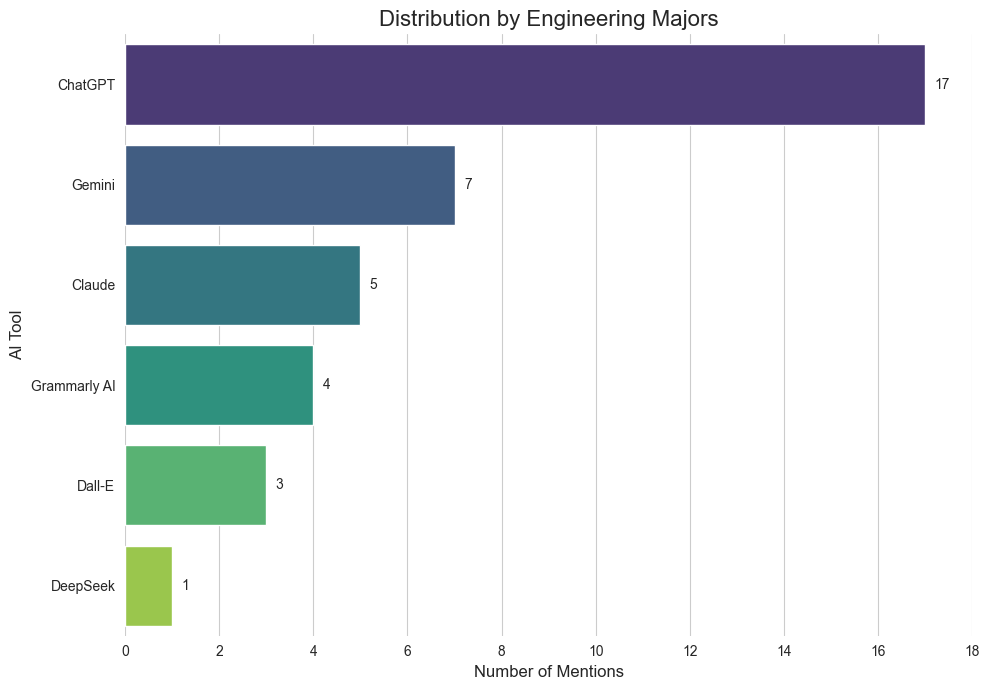

         Option  Count
0       ChatGPT     17
1        Gemini      7
2        Claude      5
3  Grammarly AI      4
4        Dall-E      3
5      DeepSeek      1


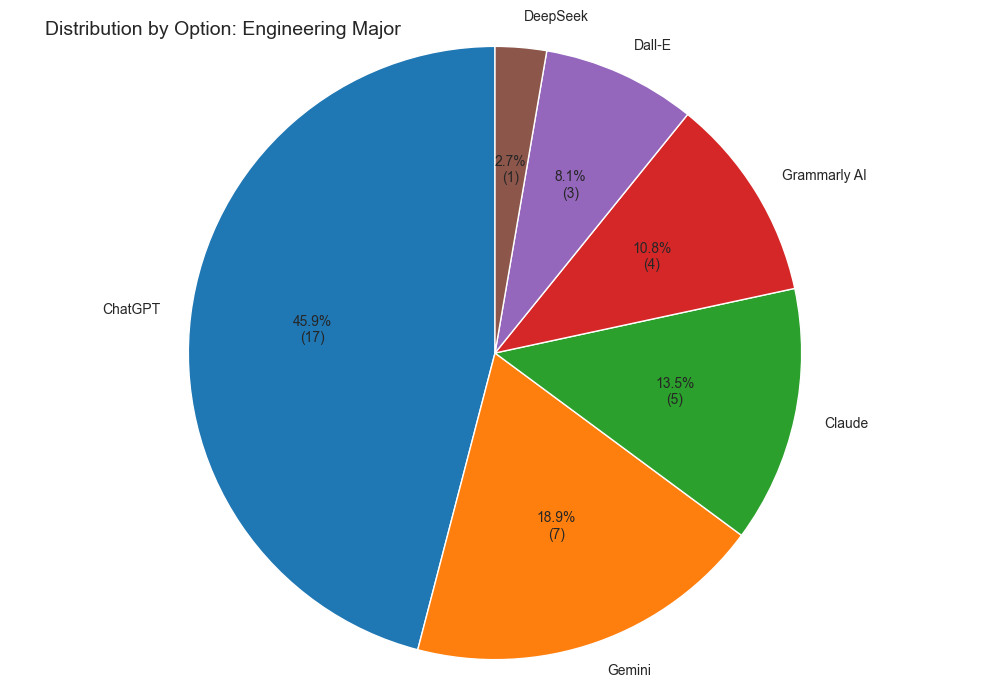


With percentages:
         Option  Count  Percentage
0       ChatGPT     17        94.4
1        Gemini      7        38.9
2        Claude      5        27.8
3  Grammarly AI      4        22.2
4        Dall-E      3        16.7
5      DeepSeek      1         5.6

Percentage of respondents who selected each option:
         Option  Count  Percentage  Respondent_Percentage
0       ChatGPT     17        94.4                   94.4
1        Gemini      7        38.9                   38.9
2        Claude      5        27.8                   27.8
3  Grammarly AI      4        22.2                   22.2
4        Dall-E      3        16.7                   16.7
5      DeepSeek      1         5.6                    5.6

Major: Liberal Arts and Sciences Major


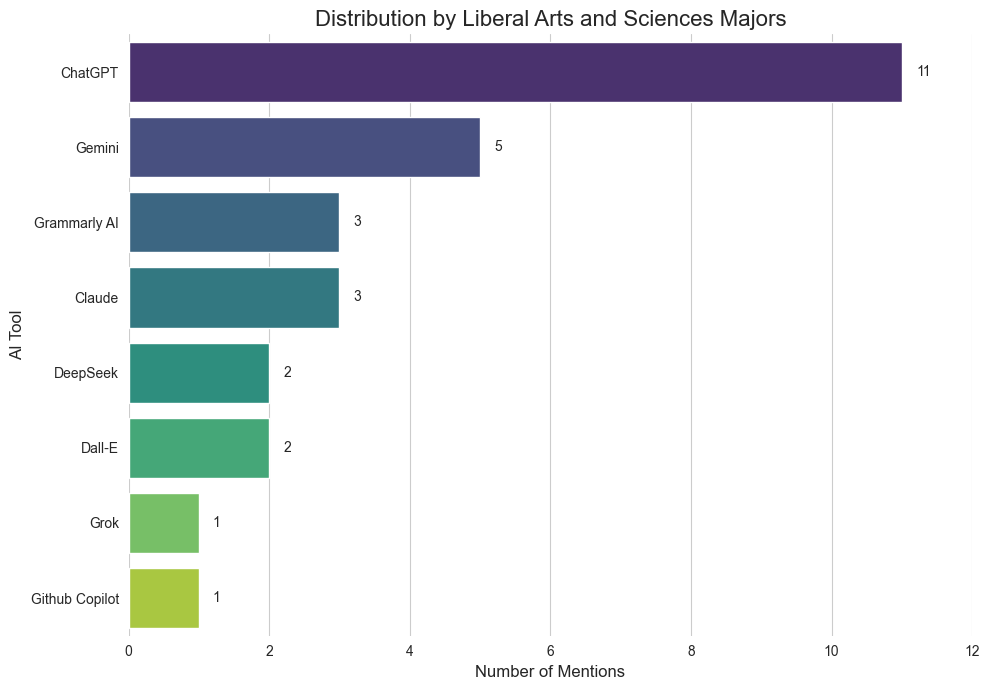

           Option  Count
0         ChatGPT     11
1          Gemini      5
2    Grammarly AI      3
3          Claude      3
4        DeepSeek      2
5          Dall-E      2
6            Grok      1
7  Github Copilot      1


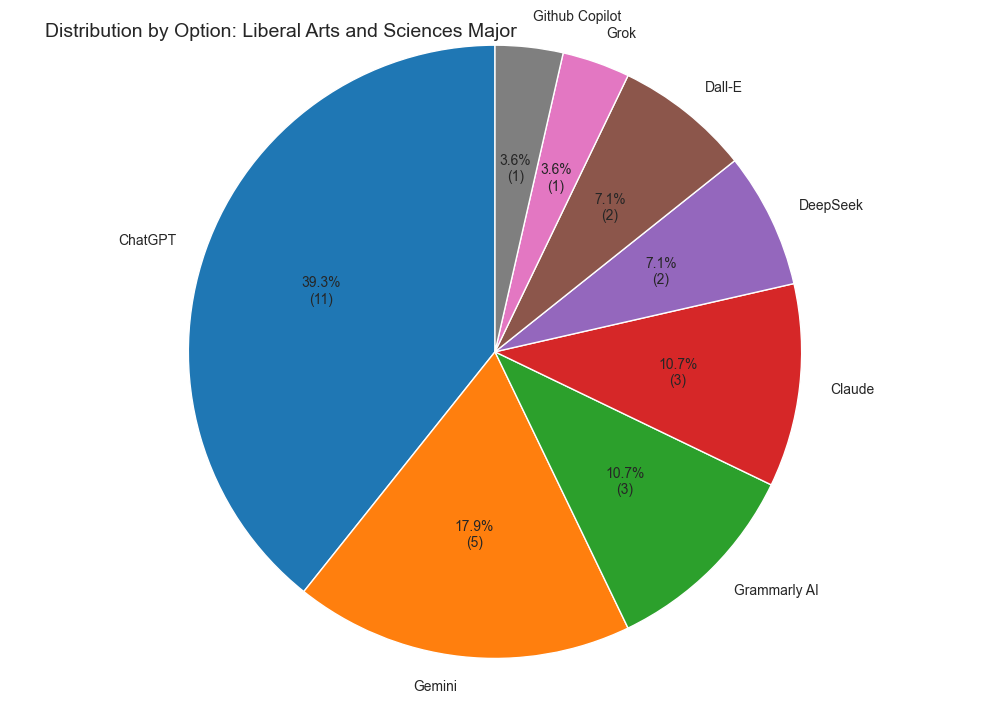


With percentages:
           Option  Count  Percentage
0         ChatGPT     11       100.0
1          Gemini      5        45.5
2    Grammarly AI      3        27.3
3          Claude      3        27.3
4        DeepSeek      2        18.2
5          Dall-E      2        18.2
6            Grok      1         9.1
7  Github Copilot      1         9.1

Percentage of respondents who selected each option:
           Option  Count  Percentage  Respondent_Percentage
0         ChatGPT     11       100.0                  100.0
1          Gemini      5        45.5                   45.5
2    Grammarly AI      3        27.3                   27.3
3          Claude      3        27.3                   27.3
4        DeepSeek      2        18.2                   18.2
5          Dall-E      2        18.2                   18.2
6            Grok      1         9.1                    9.1
7  Github Copilot      1         9.1                    9.1

Major: Business Major


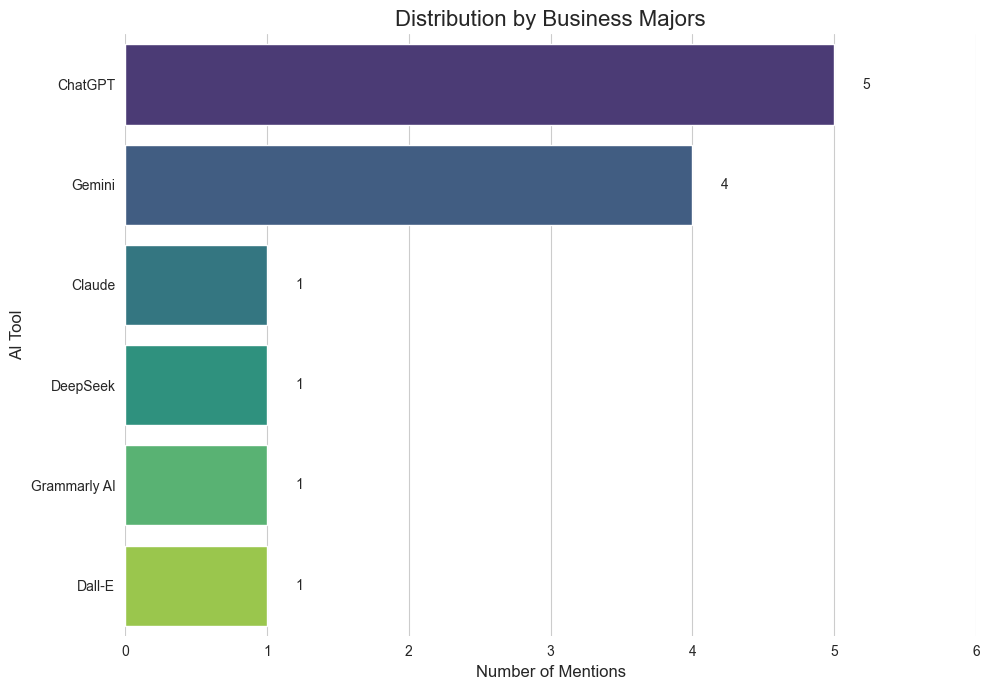

         Option  Count
0       ChatGPT      5
1        Gemini      4
2        Claude      1
3      DeepSeek      1
4  Grammarly AI      1
5        Dall-E      1


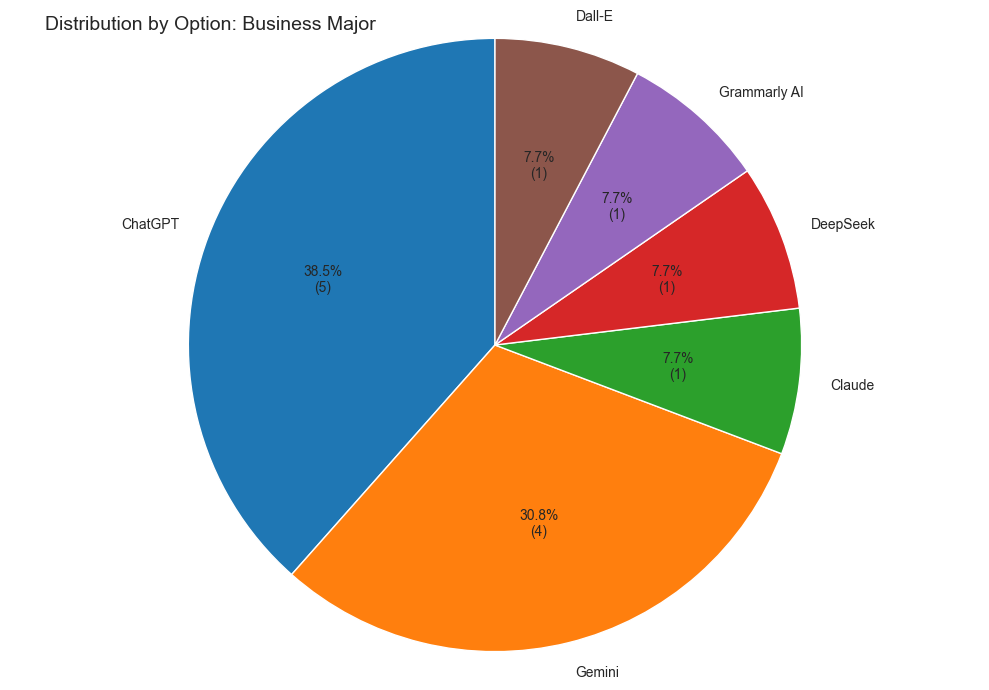


With percentages:
         Option  Count  Percentage
0       ChatGPT      5       100.0
1        Gemini      4        80.0
2        Claude      1        20.0
3      DeepSeek      1        20.0
4  Grammarly AI      1        20.0
5        Dall-E      1        20.0

Percentage of respondents who selected each option:
         Option  Count  Percentage  Respondent_Percentage
0       ChatGPT      5       100.0                  100.0
1        Gemini      4        80.0                   80.0
2        Claude      1        20.0                   20.0
3      DeepSeek      1        20.0                   20.0
4  Grammarly AI      1        20.0                   20.0
5        Dall-E      1        20.0                   20.0

Major: Health Professions Major


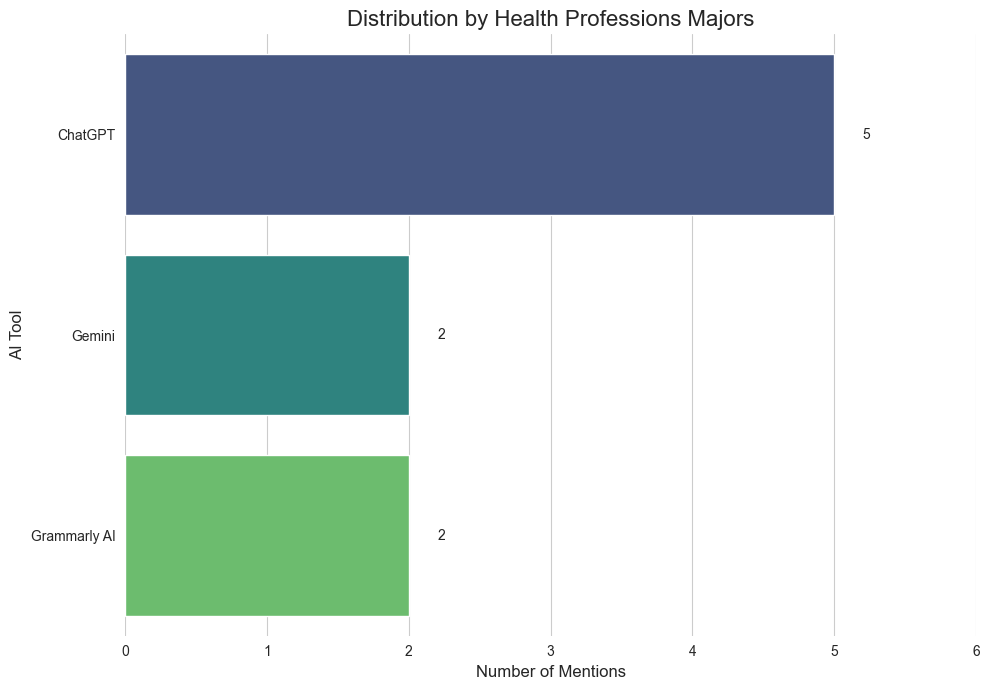

         Option  Count
0       ChatGPT      5
1        Gemini      2
2  Grammarly AI      2


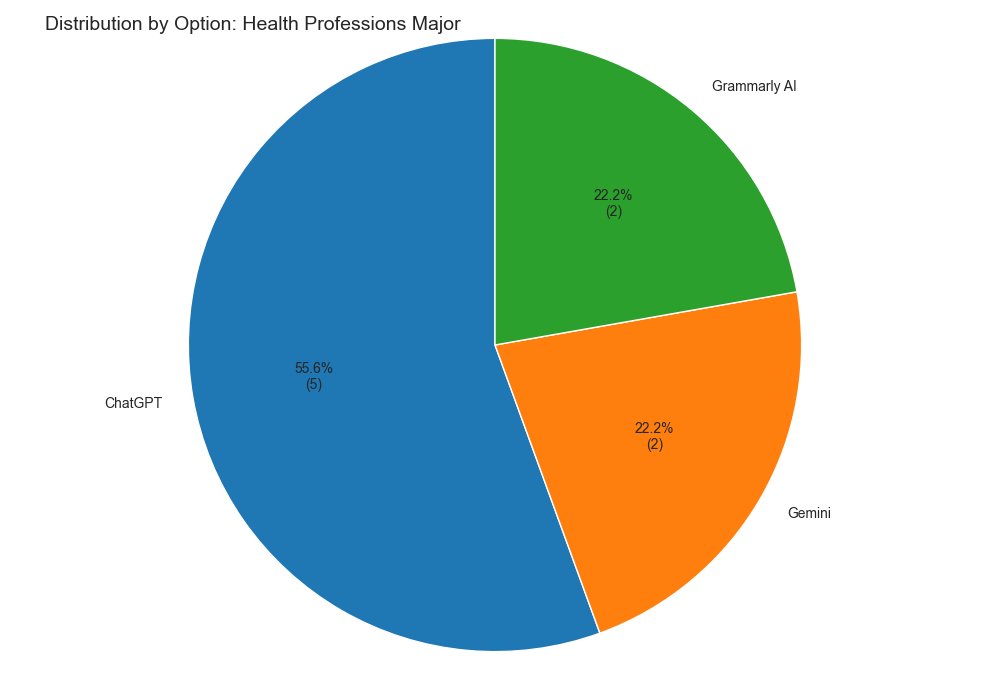


With percentages:
         Option  Count  Percentage
0       ChatGPT      5       100.0
1        Gemini      2        40.0
2  Grammarly AI      2        40.0

Percentage of respondents who selected each option:
         Option  Count  Percentage  Respondent_Percentage
0       ChatGPT      5       100.0                  100.0
1        Gemini      2        40.0                   40.0
2  Grammarly AI      2        40.0                   40.0



In [160]:
# Apply the function to your column
for major in majors:
    print(f"Major: {major['Q1'].iloc[0]}")
    q3res = count_multiple_choices(major['Q3'])
    q3plot2(f"Distribution by {major['Q1'].iloc[0]}s", q3res)
    print(q3res)

    fig, ax = plt.subplots(figsize=(10, 7))

    # Function to create custom label with both percentage and count
    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({:d})'.format(pct, val)
        return my_format

    # Create pie chart with both percentage and count in labels
    ax.pie(q3res['Count'], labels=q3res['Option'], 
        autopct=autopct_format(q3res['Count']),
        startangle=90, shadow=False)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')

    # Add title to the top left corner
    # fig.text(0.05, 0.95, 'Distribution by Option', fontsize=14, ha='left')
    fig.text(0.05, 0.95, f"Distribution by Option: {major['Q1'].iloc[0]}", fontsize=14, ha='left')

    # Display the chart
    plt.tight_layout()
    plt.show()



    # You can also calculate percentages based on total responses
    total_responses = len(major)
    q3res['Percentage'] = (q3res['Count'] / total_responses * 100).round(1)
    print("\nWith percentages:")
    print(q3res)

    # If you want to know what percentage of respondents chose each option
    q3res['Respondent_Percentage'] = (q3res['Count'] / total_responses * 100).round(1)
    print("\nPercentage of respondents who selected each option:")
    print(q3res, end="\n\n")

In [42]:
cdf = pd.read_csv('cpdata.csv')

In [43]:
ceng = cdf[cdf["Q1"] == "Engineering Major"]
clib = cdf[cdf["Q1"] == "Liberal Arts and Sciences Major"]
cbus = cdf[cdf["Q1"] == "Business Major"]
chealth = cdf[cdf["Q1"] == "Health Professions Major"]

cmajors = [ceng, clib, cbus, chealth]

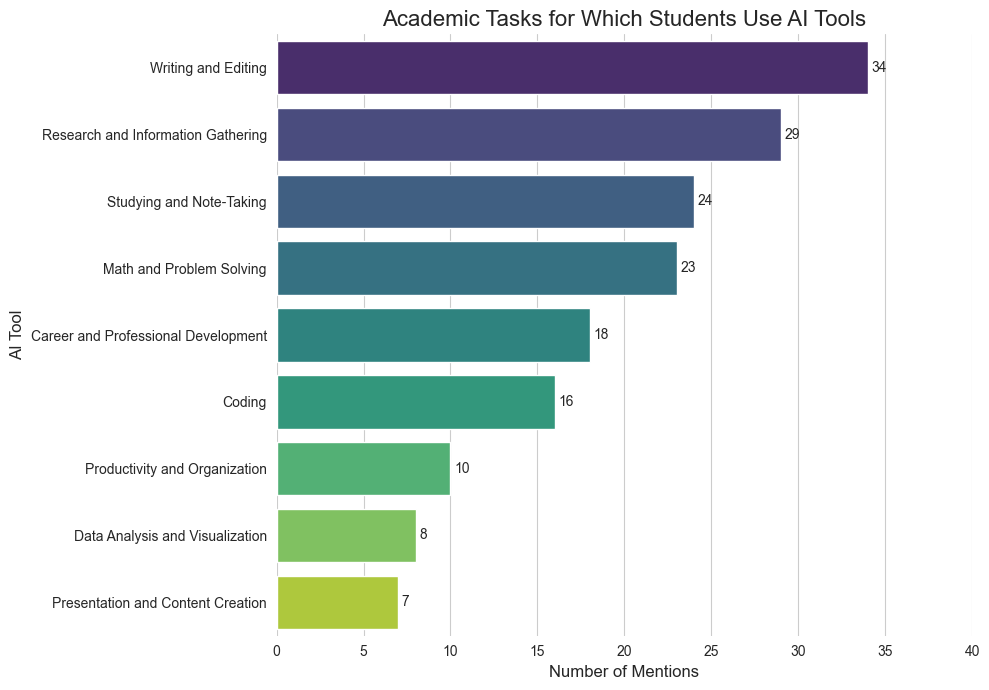

In [164]:
q4res = count_multiple_choices(cdf.loc[3:, 'Q4'])
q3plot2("Academic Tasks for Which Students Use AI Tools", q4res)

Major: Engineering Major


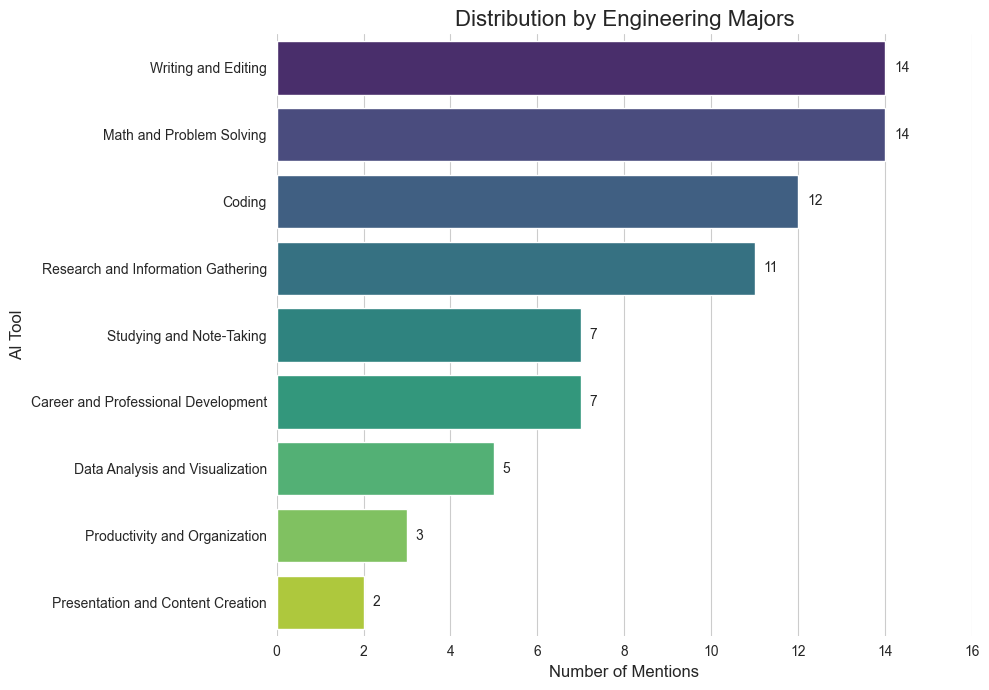

                                Option  Count
0                  Writing and Editing     14
1             Math and Problem Solving     14
2                               Coding     12
3   Research and Information Gathering     11
4             Studying and Note-Taking      7
5  Career and Professional Development      7
6      Data Analysis and Visualization      5
7        Productivity and Organization      3
8    Presentation and Content Creation      2


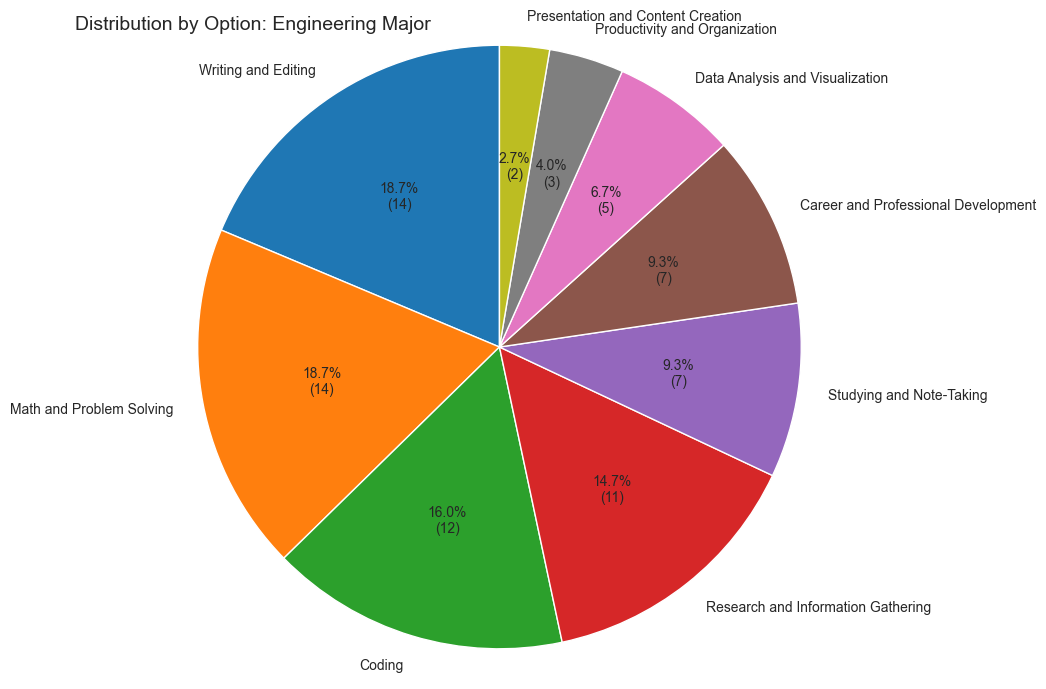


With percentages:
                                Option  Count  Percentage
0                  Writing and Editing     14        77.8
1             Math and Problem Solving     14        77.8
2                               Coding     12        66.7
3   Research and Information Gathering     11        61.1
4             Studying and Note-Taking      7        38.9
5  Career and Professional Development      7        38.9
6      Data Analysis and Visualization      5        27.8
7        Productivity and Organization      3        16.7
8    Presentation and Content Creation      2        11.1

Percentage of respondents who selected each option:
                                Option  Count  Percentage  \
0                  Writing and Editing     14        77.8   
1             Math and Problem Solving     14        77.8   
2                               Coding     12        66.7   
3   Research and Information Gathering     11        61.1   
4             Studying and Note-Taking     

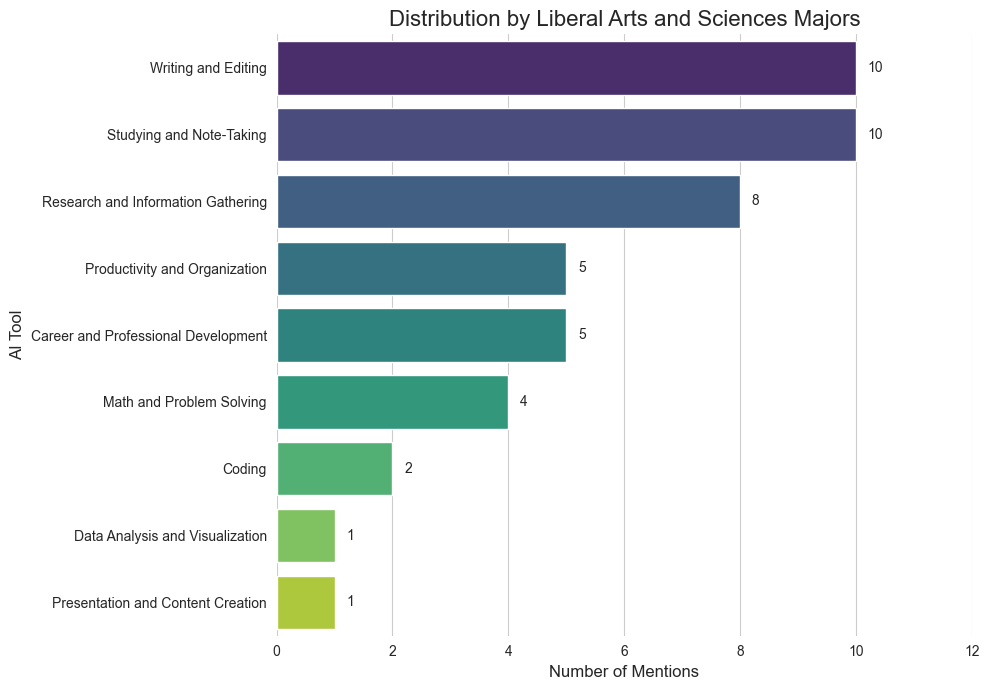

                                Option  Count
0                  Writing and Editing     10
1             Studying and Note-Taking     10
2   Research and Information Gathering      8
3        Productivity and Organization      5
4  Career and Professional Development      5
5             Math and Problem Solving      4
6                               Coding      2
7      Data Analysis and Visualization      1
8    Presentation and Content Creation      1


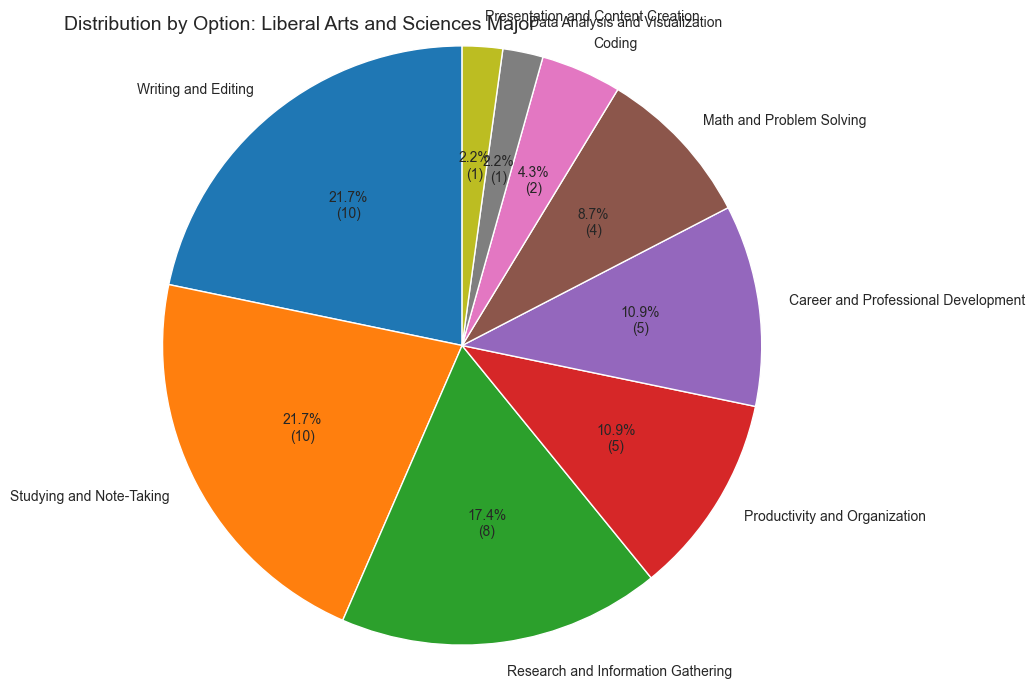


With percentages:
                                Option  Count  Percentage
0                  Writing and Editing     10        90.9
1             Studying and Note-Taking     10        90.9
2   Research and Information Gathering      8        72.7
3        Productivity and Organization      5        45.5
4  Career and Professional Development      5        45.5
5             Math and Problem Solving      4        36.4
6                               Coding      2        18.2
7      Data Analysis and Visualization      1         9.1
8    Presentation and Content Creation      1         9.1

Percentage of respondents who selected each option:
                                Option  Count  Percentage  \
0                  Writing and Editing     10        90.9   
1             Studying and Note-Taking     10        90.9   
2   Research and Information Gathering      8        72.7   
3        Productivity and Organization      5        45.5   
4  Career and Professional Development     

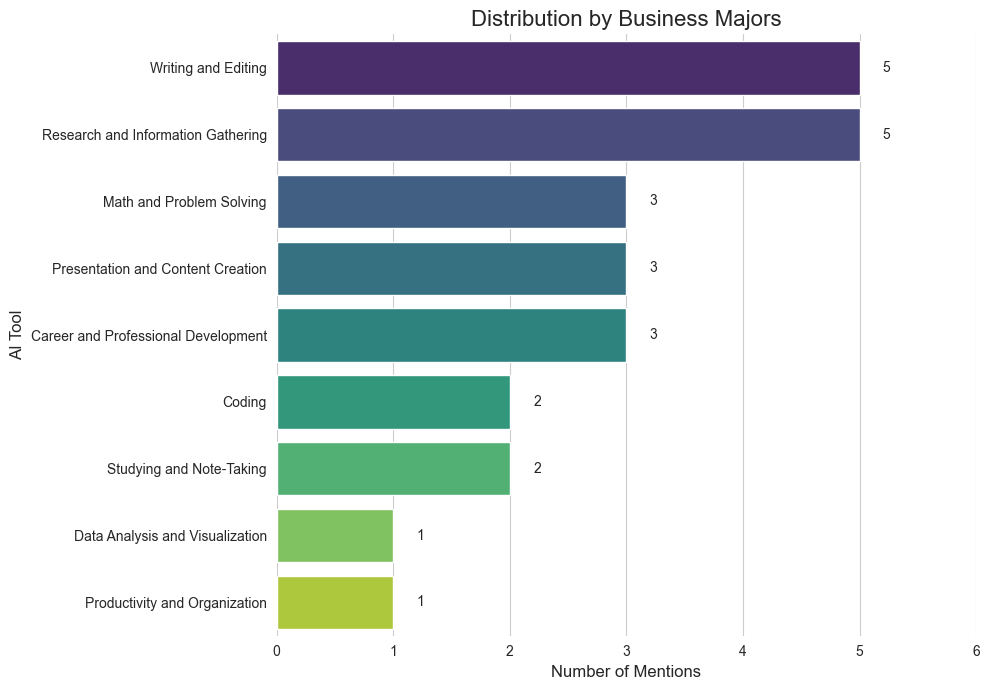

                                Option  Count
0                  Writing and Editing      5
1   Research and Information Gathering      5
2             Math and Problem Solving      3
3    Presentation and Content Creation      3
4  Career and Professional Development      3
5                               Coding      2
6             Studying and Note-Taking      2
7      Data Analysis and Visualization      1
8        Productivity and Organization      1


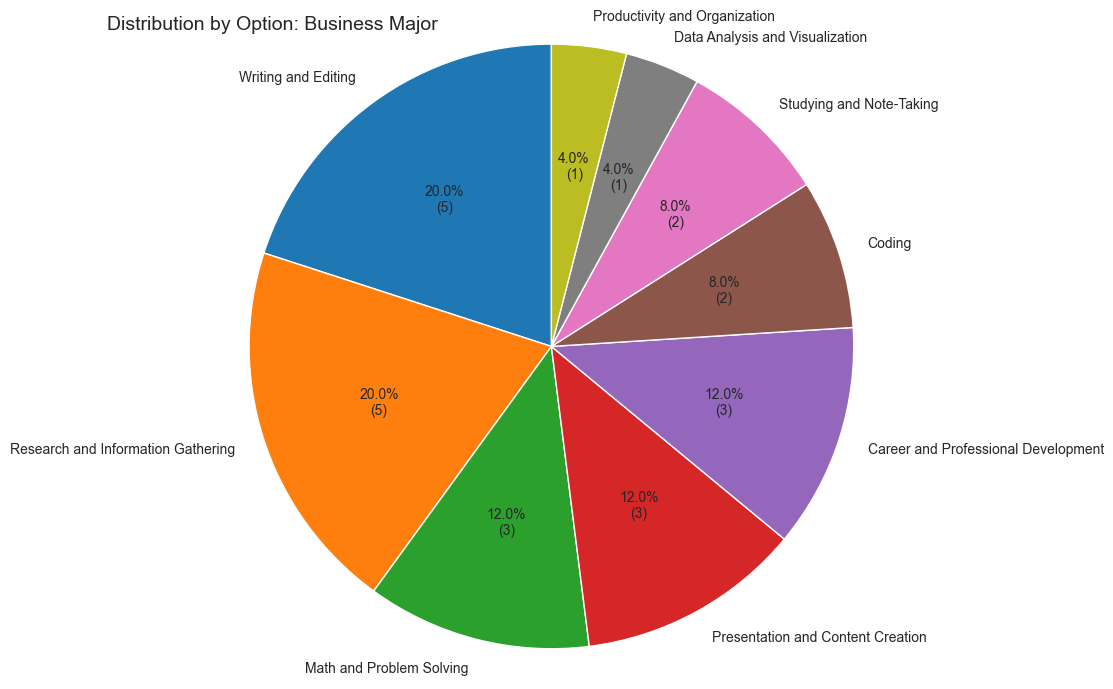


With percentages:
                                Option  Count  Percentage
0                  Writing and Editing      5       100.0
1   Research and Information Gathering      5       100.0
2             Math and Problem Solving      3        60.0
3    Presentation and Content Creation      3        60.0
4  Career and Professional Development      3        60.0
5                               Coding      2        40.0
6             Studying and Note-Taking      2        40.0
7      Data Analysis and Visualization      1        20.0
8        Productivity and Organization      1        20.0

Percentage of respondents who selected each option:
                                Option  Count  Percentage  \
0                  Writing and Editing      5       100.0   
1   Research and Information Gathering      5       100.0   
2             Math and Problem Solving      3        60.0   
3    Presentation and Content Creation      3        60.0   
4  Career and Professional Development     

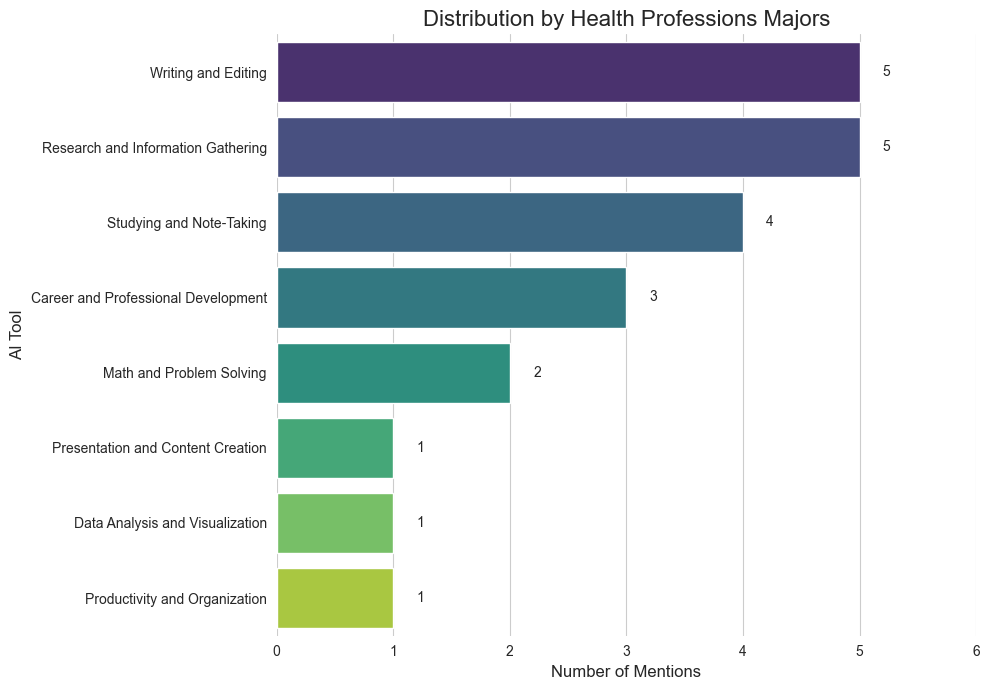

                                Option  Count
0                  Writing and Editing      5
1   Research and Information Gathering      5
2             Studying and Note-Taking      4
3  Career and Professional Development      3
4             Math and Problem Solving      2
5    Presentation and Content Creation      1
6      Data Analysis and Visualization      1
7        Productivity and Organization      1


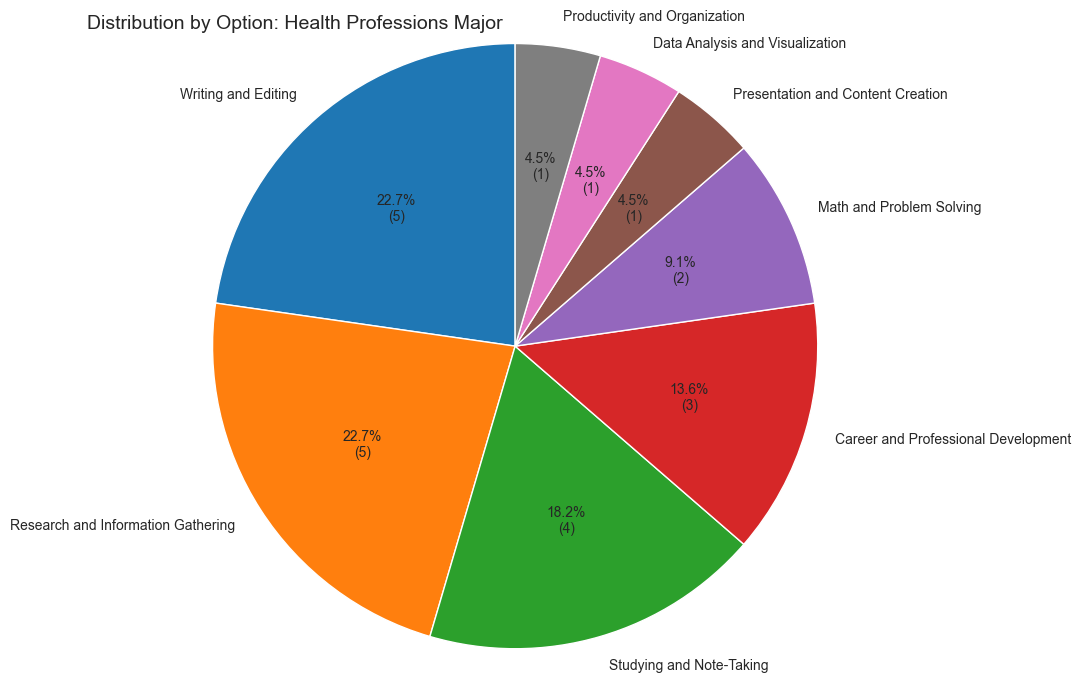


With percentages:
                                Option  Count  Percentage
0                  Writing and Editing      5       100.0
1   Research and Information Gathering      5       100.0
2             Studying and Note-Taking      4        80.0
3  Career and Professional Development      3        60.0
4             Math and Problem Solving      2        40.0
5    Presentation and Content Creation      1        20.0
6      Data Analysis and Visualization      1        20.0
7        Productivity and Organization      1        20.0

Percentage of respondents who selected each option:
                                Option  Count  Percentage  \
0                  Writing and Editing      5       100.0   
1   Research and Information Gathering      5       100.0   
2             Studying and Note-Taking      4        80.0   
3  Career and Professional Development      3        60.0   
4             Math and Problem Solving      2        40.0   
5    Presentation and Content Creation  

In [165]:
for major in cmajors:
    print(f"Major: {major['Q1'].iloc[0]}")
    q4res = count_multiple_choices(major['Q4'])
    q3plot2(f"Distribution by {major['Q1'].iloc[0]}s", q4res)
    print(q4res)

    fig, ax = plt.subplots(figsize=(10, 7))

    # Function to create custom label with both percentage and count
    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({:d})'.format(pct, val)
        return my_format

    # Create pie chart with both percentage and count in labels
    ax.pie(q4res['Count'], labels=q4res['Option'], 
        autopct=autopct_format(q4res['Count']),
        startangle=90, shadow=False)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')

    # Add title to the top left corner
    # fig.text(0.05, 0.95, 'Distribution by Option', fontsize=14, ha='left')
    fig.text(0.05, 0.95, f"Distribution by Option: {major['Q1'].iloc[0]}", fontsize=14, ha='left')

    # Display the chart
    plt.tight_layout()
    plt.show()

    # You can also calculate percentages based on total responses
    total_responses = len(major)
    q4res['Percentage'] = (q4res['Count'] / total_responses * 100).round(1)
    print("\nWith percentages:")
    print(q4res)

    # If you want to know what percentage of respondents chose each option
    q4res['Respondent_Percentage'] = (q4res['Count'] / total_responses * 100).round(1)
    print("\nPercentage of respondents who selected each option:")
    print(q4res, end="\n\n")

In [ ]:
cols = {"Q5_1" : "AI improves my learning experience as a student", "Q5_2" : "AI tools are accessible to me", "Q5_3" : "AI tools are more beneficial in my field of study compared to others"}

In [92]:
q5df = cdf[3:].copy(deep=True)

In [93]:
response_mapping = {
    1: "Strongly Disagree",
    2: "Somewhat Disagree",
    3: "Neither Agree nor Disagree", 
    4: "Somewhat Agree",
    5: "Strongly Agree"
}

# Create a function to handle the mapping including NaNs
def safe_map(x, mapping, default="No Response"):
    if pd.isna(x):
        return default
    try:
        # Try to use the value as an integer key
        return mapping.get(int(x), default)
    except (ValueError, TypeError):
        # If conversion fails, return the default
        return default

# Apply the function to create the new columns
q5df["nQ5_1"] = q5df["Q5_1"].apply(lambda x: safe_map(x, response_mapping))
q5df["nQ5_2"] = q5df["Q5_2"].apply(lambda x: safe_map(x, response_mapping))
q5df["nQ5_3"] = q5df["Q5_3"].apply(lambda x: safe_map(x, response_mapping))

In [109]:
def q5plot(title, series_to_plot):
    # Drop "No Response"
    filtered_series = series_to_plot[series_to_plot != "No Response"]

    # Get value counts
    response_counts = filtered_series.value_counts()

    # Convert to DataFrame for Seaborn
    df_counts = pd.DataFrame({'Response': response_counts.index, 'Count': response_counts.values})

    # Set a visually appealing style
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 7))

    # Create the bar plot with improved aesthetics (following the deprecation warning)
    ax = sns.barplot(x='Count', y='Response', data=df_counts,
                    order=df_counts.sort_values('Count', ascending=False)['Response'],
                    hue='Response', palette="viridis", legend=False)

    # Add labels and title with better formatting
    plt.title(title, fontsize=16)
    plt.xlabel('Number of Respondents', fontsize=12)
    plt.ylabel('Agreement Level', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)


    # Add value labels on the bars
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.2, p.get_y() + p.get_height() / 2.,
                f'{int(width)}',
                ha='left', va='center', fontsize=10)

    # Remove spines for a cleaner look
    sns.despine(left=True, bottom=True)

    plt.tight_layout()
    plt.show()

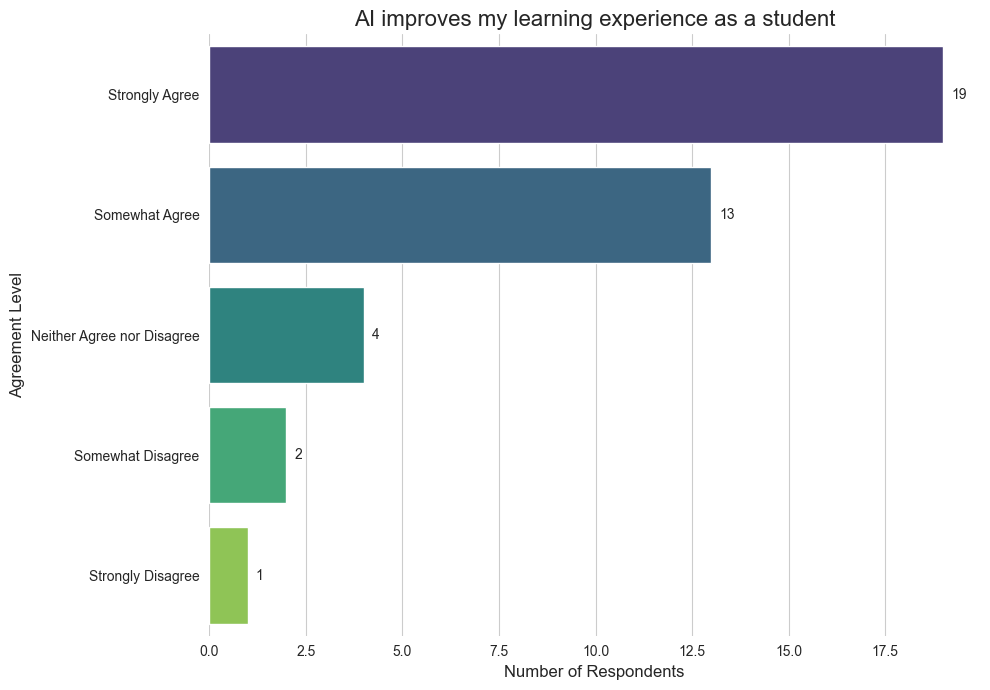

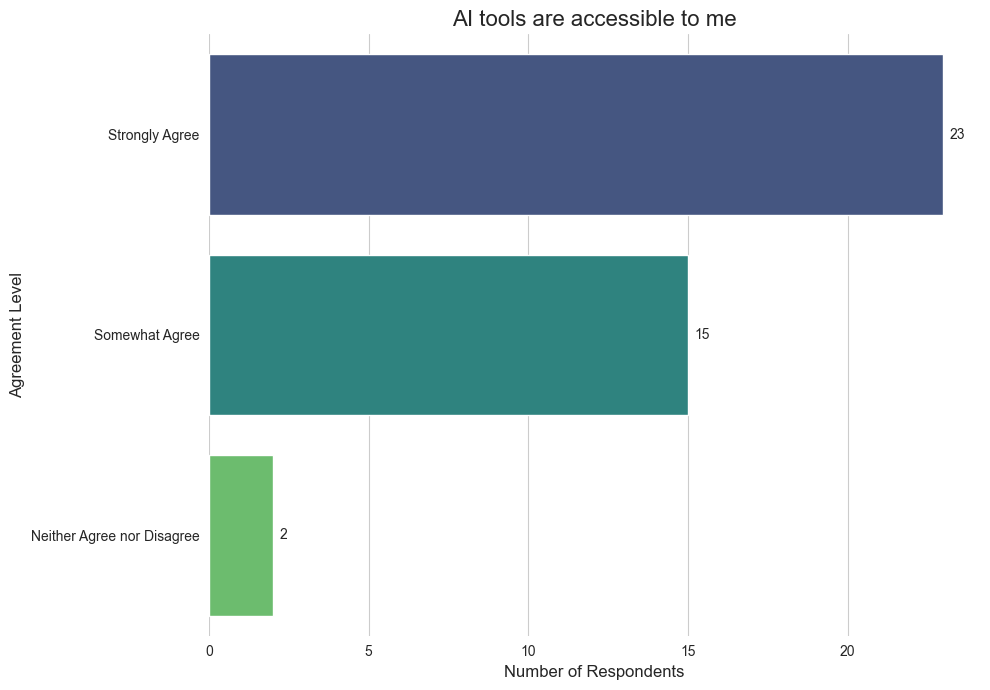

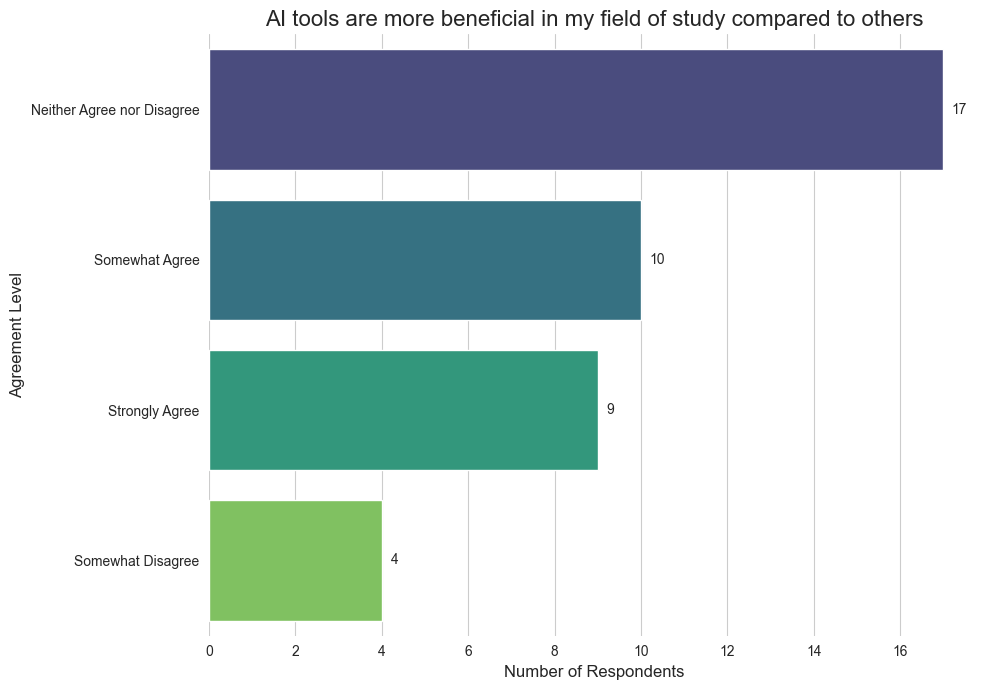

In [110]:
for col in cols.keys():
    q5plot(cols[col], q5df["n" + col])

In [113]:
q5eng = q5df[q5df["Q1"] == "Engineering Major"]
q5lib = q5df[q5df["Q1"] == "Liberal Arts and Sciences Major"]
q5bus = q5df[q5df["Q1"] == "Business Major"]
q5health = q5df[q5df["Q1"] == "Health Professions Major"]

q5majors = [q5eng, q5lib, q5bus, q5health]

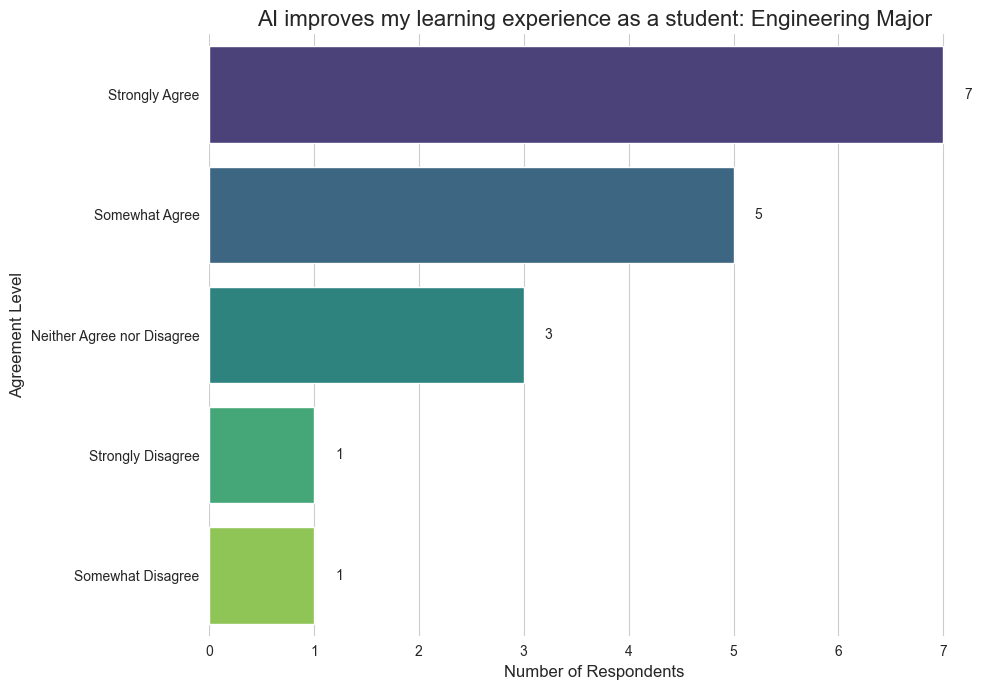

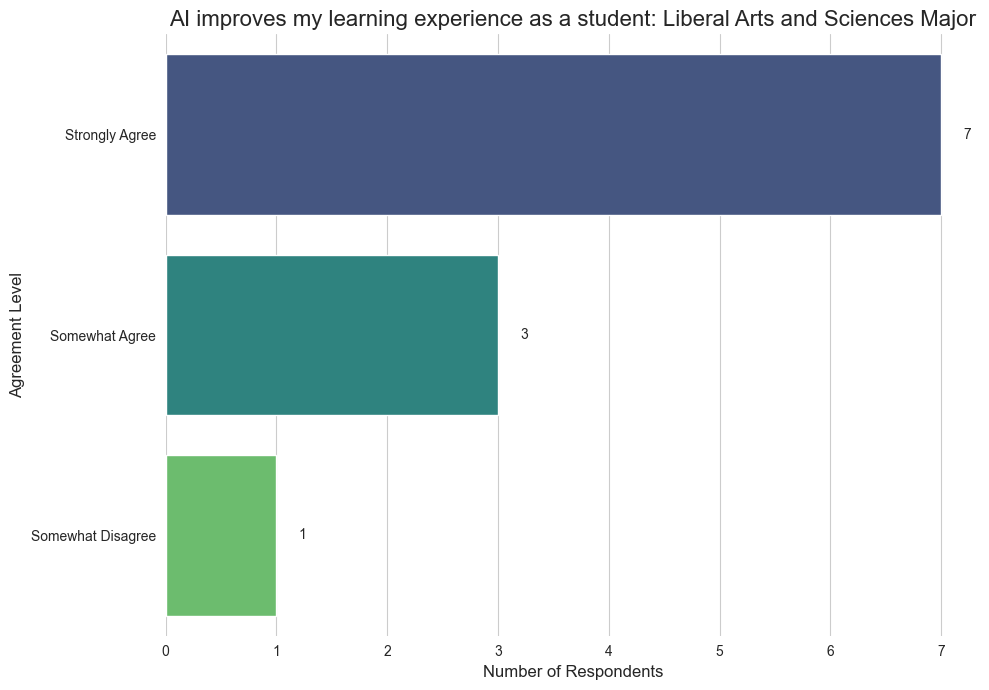

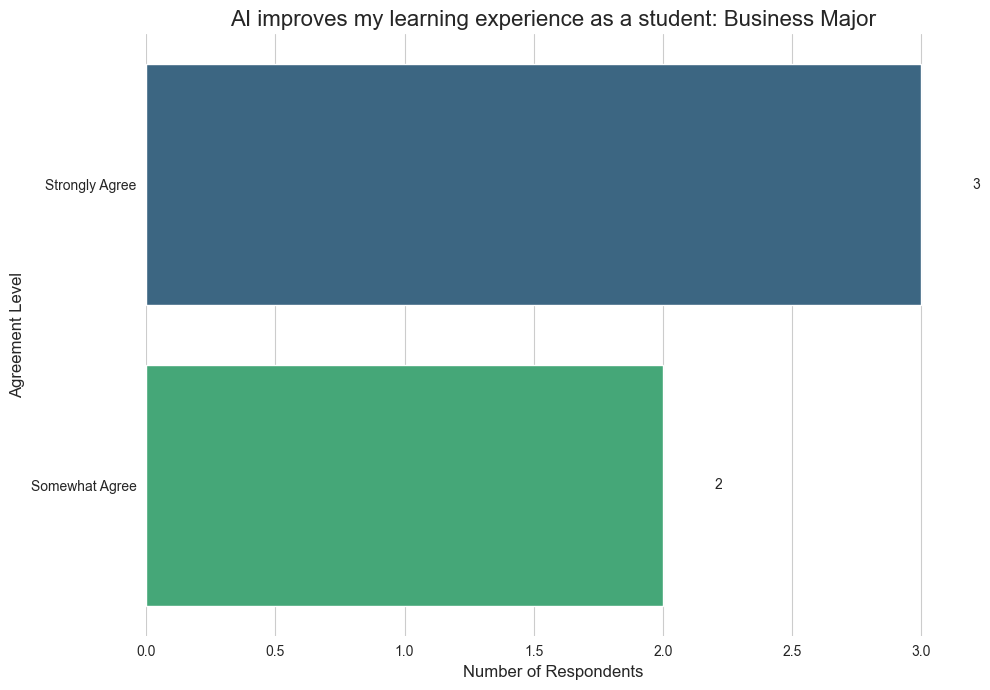

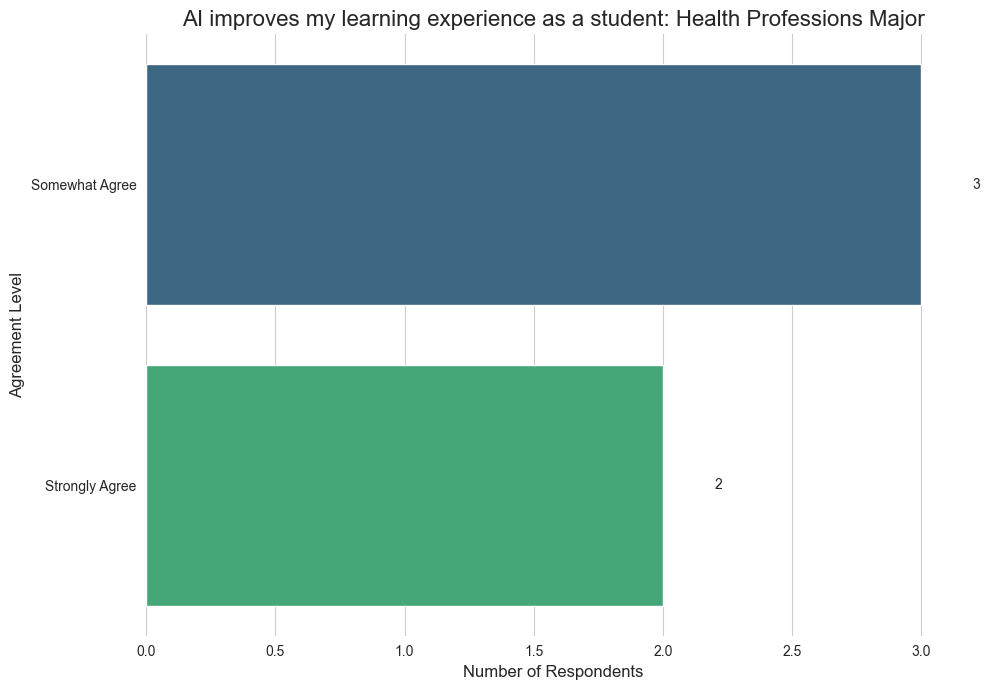

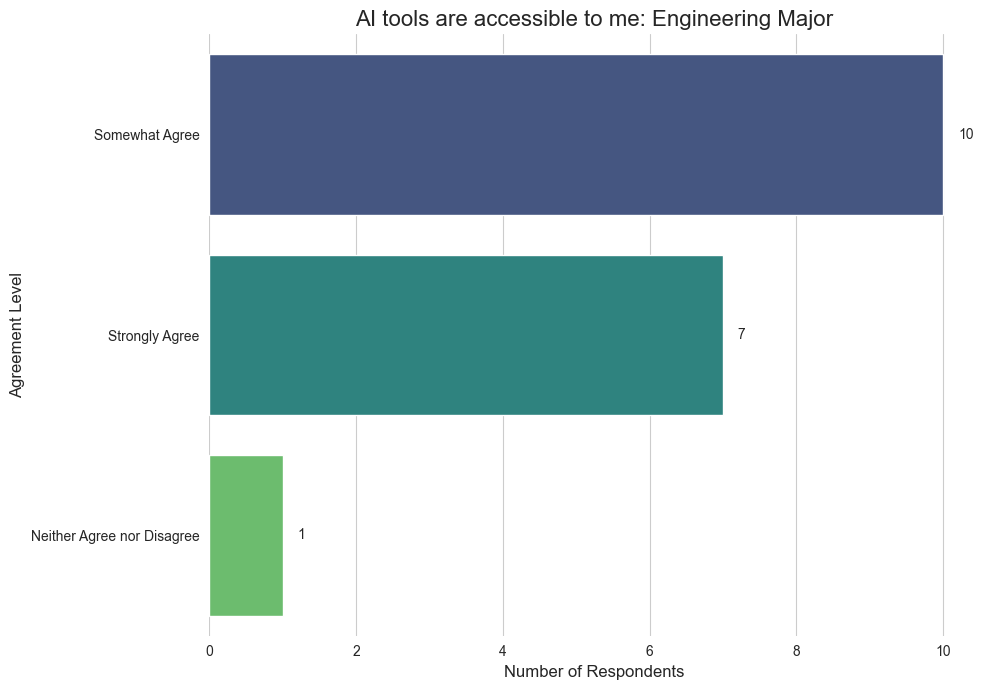

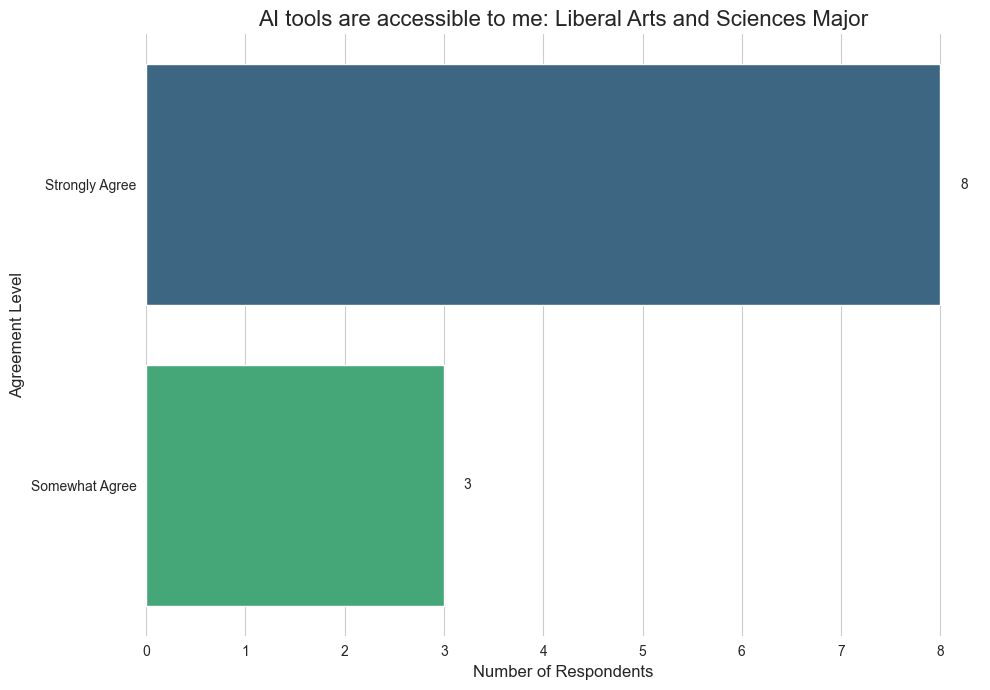

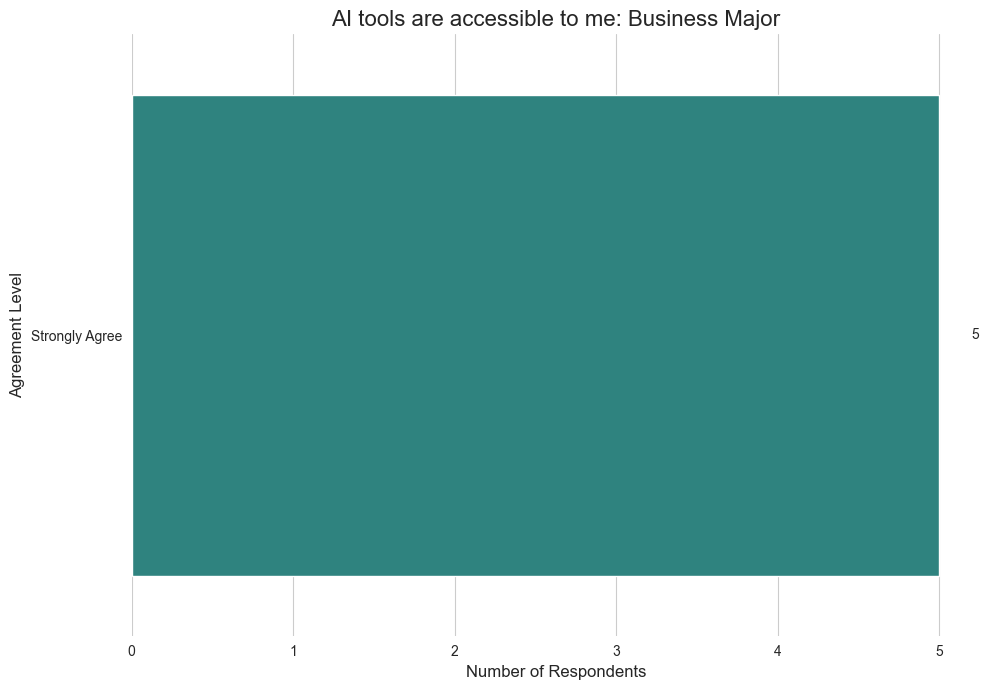

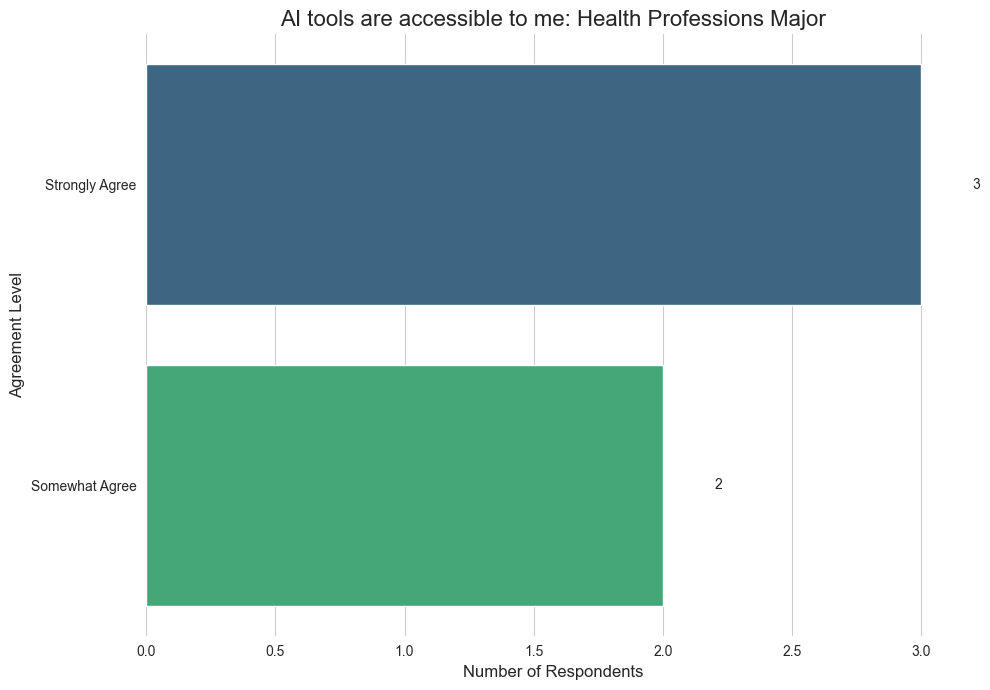

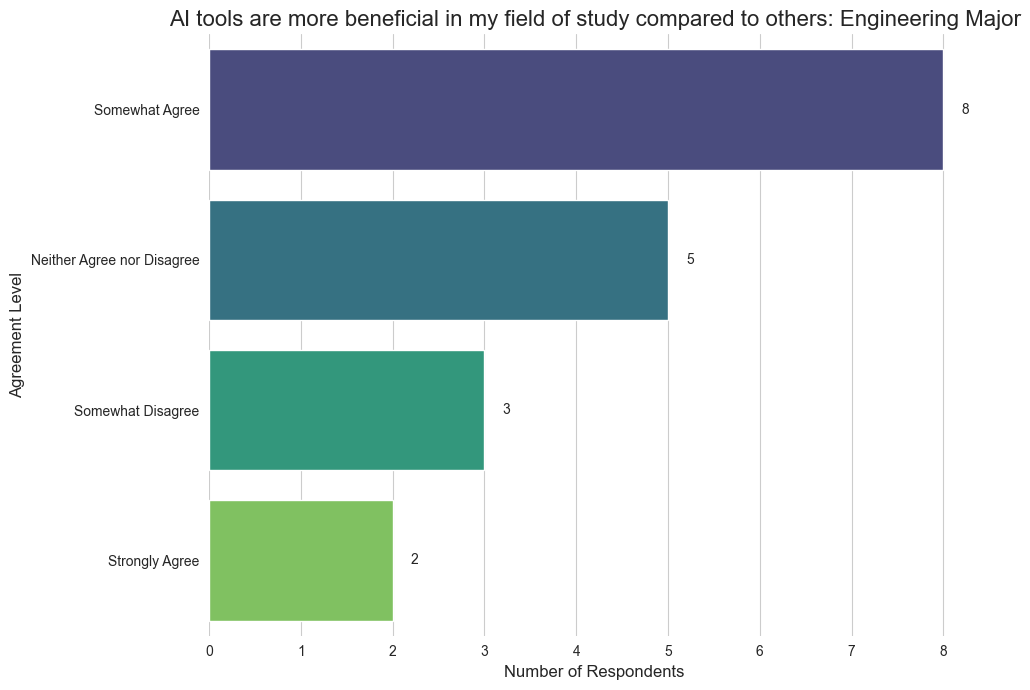

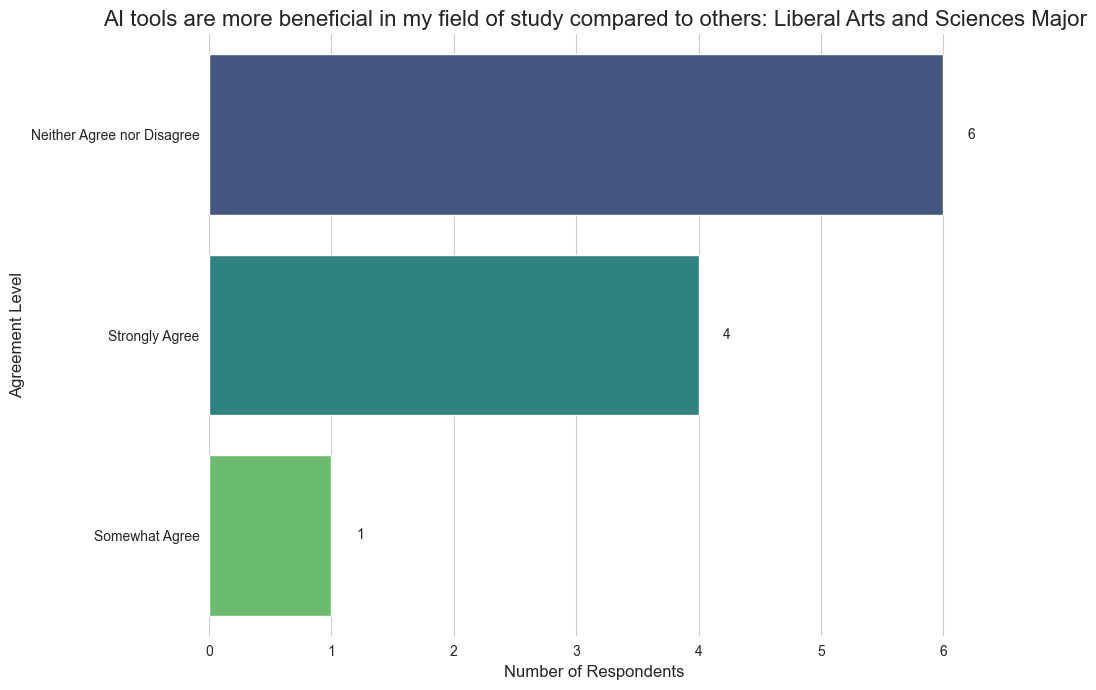

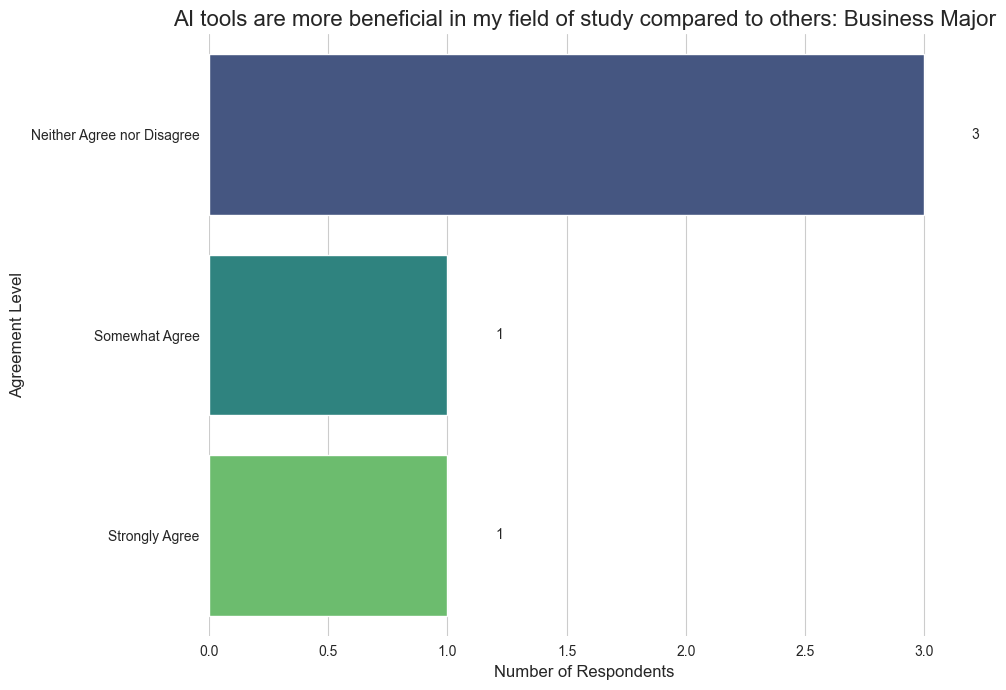

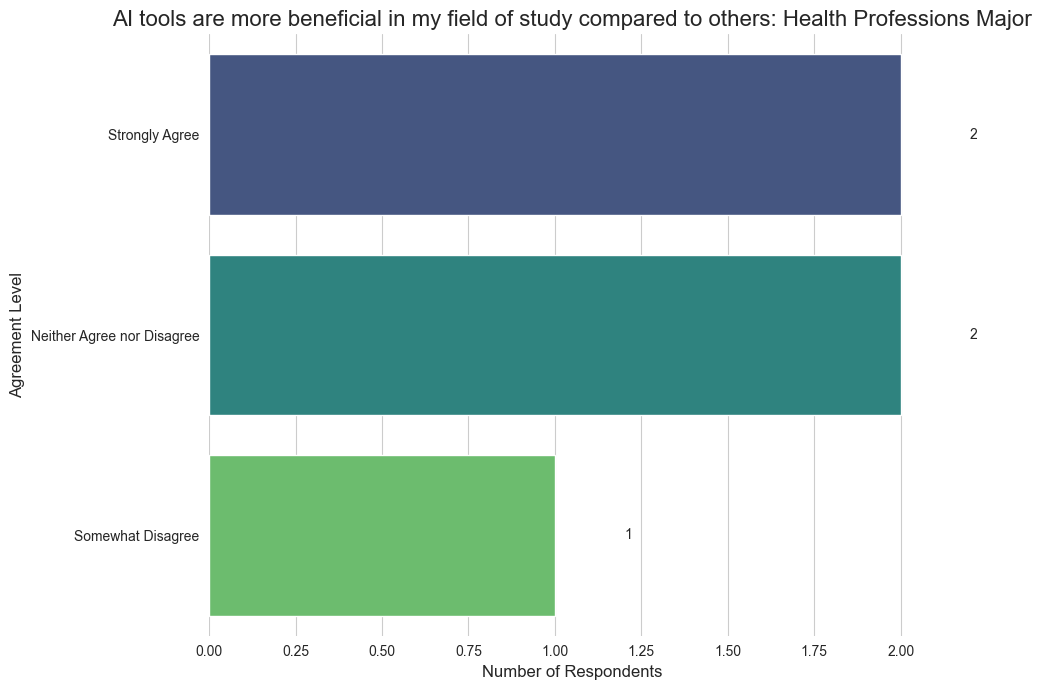

In [116]:
for col in cols.keys():
    for major in q5majors:
        q5plot(f"{cols[col]}: {major['Q1'].iloc[0]}", major["n" + col])